In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # sets up pretty plots
%matplotlib inline

In [2]:
df = pd.read_pickle('clean_dummy_data.pkl')

In [3]:
df.head()

,Client Name,Order Result,Amount,Close Date,Business Type,Lead Source,Created Date,Loss Reason,Project Name,Project Location
0,Client 1,Lost order,5616.0,2019-04-22,New Business,Phone,2019-04-30 08:49:52,Price,Project 1,Abu Dhabi Region
1,Client 2,Lost order,1840.0,2019-01-29,NaN,NaN,2019-04-27 07:43:51,NaN,Project 2,Abu Dhabi
2,Client 3,Lost order,0.0,2019-01-21,NaN,NaN,2019-04-27 07:16:53,NaN,Project 3,Abu Dhabi
3,Client 4,Lost order,37370.0,2019-04-13,New Business,Phone,2019-04-29 13:46:46,No Decision / Non-Responsive,Project 4,Abu Dhabi
4,Client 5,Lost order,4720.0,2019-04-13,New Business,Phone,2019-04-29 12:33:56,Other,Project 5,Abu Dhabi


# Money

### Amount Earned Last Month

In [4]:
df1 = pd.DataFrame(df, columns=['Amount', 'Order Result', 'Close Date'])
df1 = df1[(df1['Order Result']=='Won order')] # df1 should have only ros where the order was won
df1 = df1[(df1['Close Date'].dt.year == 2019)] # df1 should only contain rows where the year is 2019
df1 = df1[(df1['Close Date'].dt.month == 6)] # df1 should only contain rows where the month is June

In [5]:
print(df1)

     Amount Order Result Close Date
105   390.0    Won order 2019-06-15
242   204.0    Won order 2019-06-02
243   324.0    Won order 2019-06-13


In [6]:
last_month_total =  df1['Amount'].sum()

In [7]:
print('Total Amount from last Month = ', last_month_total)

Total Amount from last Month =  918.0


### Amount Earned by Month

In [8]:
df2 = pd.DataFrame(df, columns=['Amount','Order Result', 'Close Date'])
df2 = df2[(df2['Order Result']=='Won order')] # df1 should have only ros where the order was won
df2 = df2[(df2['Close Date'].dt.year == 2019)] # df1 should only contain rows where the year is 2019

In [9]:
df2.head()

,Amount,Order Result,Close Date
15,6392.0,Won order,2019-04-24
20,1060.0,Won order,2019-03-31
27,560.0,Won order,2019-03-16
34,210.0,Won order,2019-04-16
35,324.0,Won order,2019-05-30


In [10]:
df2['month'] = df2['Close Date'].dt.month

In [11]:
df2.head()

,Amount,Order Result,Close Date,month
15,6392.0,Won order,2019-04-24,4
20,1060.0,Won order,2019-03-31,3
27,560.0,Won order,2019-03-16,3
34,210.0,Won order,2019-04-16,4
35,324.0,Won order,2019-05-30,5


In [12]:
df2.drop(['Order Result', 'Close Date'], axis=1, inplace=True)

In [13]:
df3 = df2.groupby(['month']).sum()

In [34]:
df3

,Amount
month,
1,4560.0000
2,11814.2002
3,15528.0000
4,14128.0000
5,8496.0000
6,918.0000


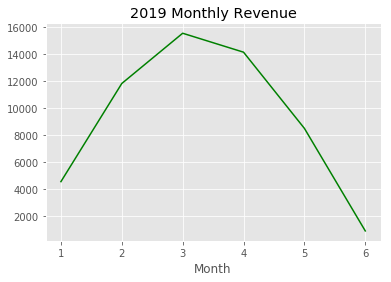

In [39]:
df3.plot(kind='line', color='green')
plt.xlabel('Month')
plt.title('2019 Monthly Revenue')
plt.legend().set_visible(False)

In [15]:
df.head()

,Client Name,Order Result,Amount,Close Date,Business Type,Lead Source,Created Date,Loss Reason,Project Name,Project Location
0,Client 1,Lost order,5616.0,2019-04-22,New Business,Phone,2019-04-30 08:49:52,Price,Project 1,Abu Dhabi Region
1,Client 2,Lost order,1840.0,2019-01-29,NaN,NaN,2019-04-27 07:43:51,NaN,Project 2,Abu Dhabi
2,Client 3,Lost order,0.0,2019-01-21,NaN,NaN,2019-04-27 07:16:53,NaN,Project 3,Abu Dhabi
3,Client 4,Lost order,37370.0,2019-04-13,New Business,Phone,2019-04-29 13:46:46,No Decision / Non-Responsive,Project 4,Abu Dhabi
4,Client 5,Lost order,4720.0,2019-04-13,New Business,Phone,2019-04-29 12:33:56,Other,Project 5,Abu Dhabi


In [16]:
df_new = pd.DataFrame(df, columns=['Business Type', 'Order Result', 'Close Date'])
df_new = df_new[(df_new['Order Result']=='Won order')] # df1 should have only ros where the order was won
df_new = df_new[(df_new['Close Date'].dt.year == 2019)]# df1 should only contain rows where the year is 2019
df_new = df_new[(df_new['Business Type']=='New Business')]
df_new['month']=df_new['Close Date'].dt.month

In [17]:
df_new

,Business Type,Order Result,Close Date,month
15,New Business,Won order,2019-04-24,4
20,New Business,Won order,2019-03-31,3
27,New Business,Won order,2019-03-16,3
47,New Business,Won order,2019-04-28,4
52,New Business,Won order,2019-03-30,3
207,New Business,Won order,2019-03-19,3
234,New Business,Won order,2019-02-05,2


In [18]:
df_new.drop(['Order Result', 'Close Date'], axis=1, inplace =True)


In [23]:
df_new.rename(columns={'Business Type':'New Business'}, inplace=True)

In [25]:
graph_table=df_new.groupby(['month']).count()

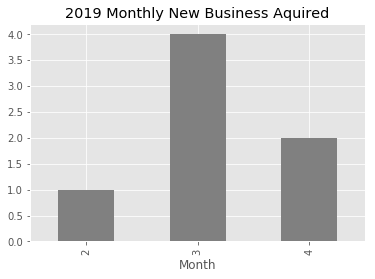

In [38]:
graph_table.plot(kind='bar', color='grey')
plt.xlabel('Month')
plt.title('2019 Monthly New Business Aquired')
plt.legend().set_visible(False)